# Project: Investigate a Dataset of 10 000 movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Dataset**

> In this report the Movie Database (TMDb) dataset is explored and analysed. This dataset contains information
about 10,000 movies such as movie name and release year, user ratings (1 to 10), director and cast names, budget and revenue (in dollars) and so on.

> **Research Questions**
1. Which genres are most popular from year to year? 
2. What kinds of properties are associated with movies that have high revenues? 
3. What can we say about the success of a movie before it is released? Are there certain companies that have found a consistent formula?

> In order to answer these reasearch  questions some further assumptions have to be made first, in order to answer following subquestions:
1. How to account for movie categorized with multiple genres?
2. How to define high revenue? What will be the treshold value?
3. How to define the success of the movie - based on revenue, popularity or user rating?

> **Assumptions**
1. All genres of each movie will be accounted for - not only the first genre mentioned in genre description
2. 90% percentile of the dataset with revenue reported is selected as the treshold for high revenues
3. Movie success will be based on the economic parameters like revenue values (as defined in previous question)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='ticks')

# alter the display of scientific notation in Pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)


Bad key "text.kerning_factor" on line 4 in
c:\programdata\anaconda3\envs\udacity\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


<a id='wrangling'></a>
## Data Wrangling

### General Properties
After loading data and printing out a few lines, some issues can immediately be detected. For example, the bar '|' symbol can be seen in the genres, cast, director and production companies columns. So it means one cell contains multiple values, this must be accounted for before the exploratory data analysis.

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49


In [3]:
# It can be seen that there are in total 21 variables and 10866 obervations
df.shape

(10866, 21)

In [4]:
# Invetigate the variable types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# Not all of the columns will be necessary to answer the research questions
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

Therefore redundant columns are dropped. Columns like 'release_date' contain the same info as 'release_year'. Also it is chosen to use the 'budget_adj' and 'revenue_adj' and drop 'budget' and 'revenue' columns to properly compare data.

In [6]:
columns_to_drop = ['id', 'budget', 'revenue', 'imdb_id','tagline', 'homepage','keywords', 'overview', 'runtime', 'release_date']

In [7]:
# Variables and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

There seem not be big issues with the variable types, all variables that were expected to be numeric are either in integer or float format. So that is good.

In [8]:
# Descriptive statistics of numeric variables
df.describe().round(2)

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


 From the Descriptive statistics it can be seen that some rows have 0 value for budget and revenue (min and 50% percentiles are 0). 
 It appears to be quite many observations, namely more than a half that don't have budget or revenue. Precise count for budget and revenue columns are calculated below.

In [9]:
df.query('budget_adj == 0')['budget_adj'].count(), df.query('revenue_adj == 0')['revenue_adj'].count()

(5696, 6016)

### Data Cleaning
1. Unnecessary columns from original dataset are dropped 
2. Revenue observations with 0 values are filtered out for the revenue analysis (but are kept for genre counts)
3. Genres column is treated to acount fior multiple values in one observation

#### 1. Removing unnecessary columns
List of columns to remove is described in General description. After removing the unncessary columns, the remaining variables are further treated.

In [10]:
df = df.drop(labels=columns_to_drop, axis=1)
df.head(2)

,popularity,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.99,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.50,2015,137999939.28,1392445892.52
1,28.42,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.10,2015,137999939.28,348161292.49


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   original_title        10866 non-null  object 
 2   cast                  10790 non-null  object 
 3   director              10822 non-null  object 
 4   genres                10843 non-null  object 
 5   production_companies  9836 non-null   object 
 6   vote_count            10866 non-null  int64  
 7   vote_average          10866 non-null  float64
 8   release_year          10866 non-null  int64  
 9   budget_adj            10866 non-null  float64
 10  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 933.9+ KB


#### 2. Filtering revenue data
Therefore for the further analysis of revenue, the data is filtered for values larger than 0 dollars. The assumption is that those zeros are missing values, but it could as well be that the 6016 movies did not have any revenue. However, as the movies with high revenues are of interest, it will not affect further analysis anyway, except the determination of the desciptive statistics.

In [12]:
df_with_revenue = df.query('revenue_adj > 0')

In [13]:
# This will be the dataFrame use for revenue analysis
df_with_revenue.describe()

,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,4850.00,4850.00,4850.00,4850.00,4850.00,4850.00
mean,1.05,436.22,6.15,2000.92,35161017.18,115077354.87
std,1.36,806.42,0.80,11.57,43756717.05,198841916.05
min,0.00,10.00,2.10,1960.00,0.00,2.37
25%,0.39,46.00,5.60,1994.00,2332077.79,10462622.84
50%,0.68,147.00,6.20,2004.00,20328008.68,43927485.54
75%,1.21,435.00,6.70,2010.00,49735160.27,131564380.46
max,32.99,9767.00,8.40,2015.00,425000000.00,2827123750.41


#### 3. Dealing with multiple values in Genres column
Using Pandas str and get_dummies() methods, the bar '|' symbol is accounted for. The same treatment is done for the cast, director and production companies columns answering the 3rd research question.  

In [14]:
# Group genres for each year
df_genres = df[['release_year', 'genres']].groupby('release_year').apply(lambda x: x['genres'].str.get_dummies(sep='|').sum().sort_values(ascending=False))
df_genres.head(16)

release_year                 
1960          Drama              13
              Comedy              8
              Action              8
              Horror              7
              Western             6
              Thriller            6
              Romance             6
              History             5
              Adventure           5
              Science Fiction     3
              Family              3
              War                 2
              Fantasy             2
              Crime               2
              Music               1
              Foreign             1
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which genres are most popular from year to year?

First let's take a look what genres are the most popular overall. As it can be seen from the pie chart, the most popular genres are:
1. Drama
2. Comedy
3. Thriller
4. Action
5. Romance

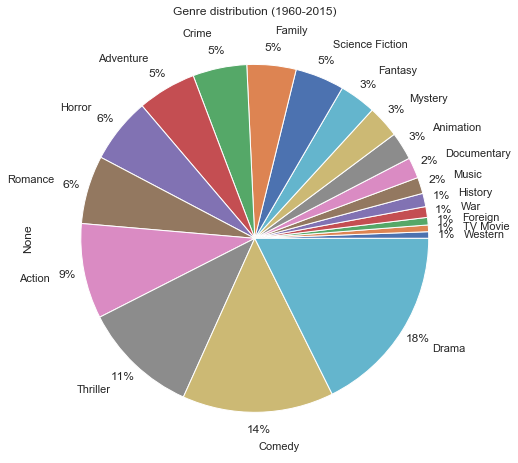

In [15]:
(df.genres
 .str.get_dummies(sep='|').sum().sort_values()
 .plot(kind='pie', figsize=(8,8), title= 'Genre distribution (1960-2015)', autopct='%1.0f%%',pctdistance=1.1, labeldistance=1.2));

Let's investigate what changes have occured to these genres over time by counting multiple genres values for each year separatley.



Further let's limit the large amount of genres and select only the top 3 most frequent genres of each year.

In [16]:
series_genres = df_genres.groupby(level=0).head(3)
series_genres.head(10)

release_year          
1960          Drama       13
              Comedy       8
              Action       8
1961          Drama       16
              Comedy      10
              Action       7
1962          Drama       21
              Action       8
              Thriller     7
1963          Drama       13
dtype: int64

As it can be seen in the visualizations, the number of movies registered has increased steadily over time. Furthermore, the most popuar genre troughout the years is drama followed by the comedy. Interesting to observe that thriller(action) movies have gained more popularity in the last years. However, it might not be appropriate satement becaue the proportion seems to stay the same.

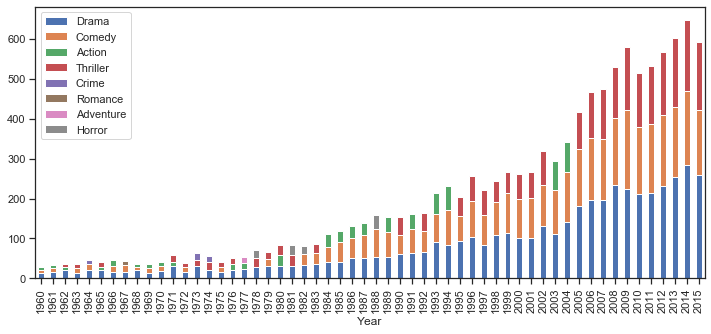

In [17]:
series_genres.unstack(level=1).plot(kind='bar', stacked=True, figsize=(12,5))
plt.xlabel('Year');

### Research Question 2: What kinds of properties are associated with movies that have high revenues? 

As mentioned in introduction, the treshold limit for high revenue movies is taken as a 90 percentile.

In [18]:
high_revenue_treshold = np.percentile(df_with_revenue['revenue_adj'], 90).round(2)
high_revenue_treshold

306630150.44

In [28]:
# Create masks for boolean indexing
mask_high_revenue = df_with_revenue['revenue_adj'] >= high_revenue_treshold
mask_lower_revenue = df_with_revenue['revenue_adj'] < high_revenue_treshold

# Split the revenue datframe based on filters
df_lower_revenue = df_with_revenue.loc[mask_lower_revenue]
df_high_revenue = df_with_revenue.loc[mask_high_revenue]

# Add a column 'high_revenue', above and below treshold
df_with_revenue.loc[:, 'high_revenue'] = False
df_with_revenue.loc[mask_high_revenue, 'high_revenue'] = True

# Number of movies with high revenue
df_high_revenue.shape[0]

485

#### Distributions and correlations of variables

The pairplot shows the variable distributions of top 10% high revenue movies (in orange) and the rest of the movies (in blue).

On the diagonal of the plot the variable distribution differences can be seen. Higher budgets and slightly higher average votes score and count and higher popularity rating frequency can be observed for the high revenue movies. 

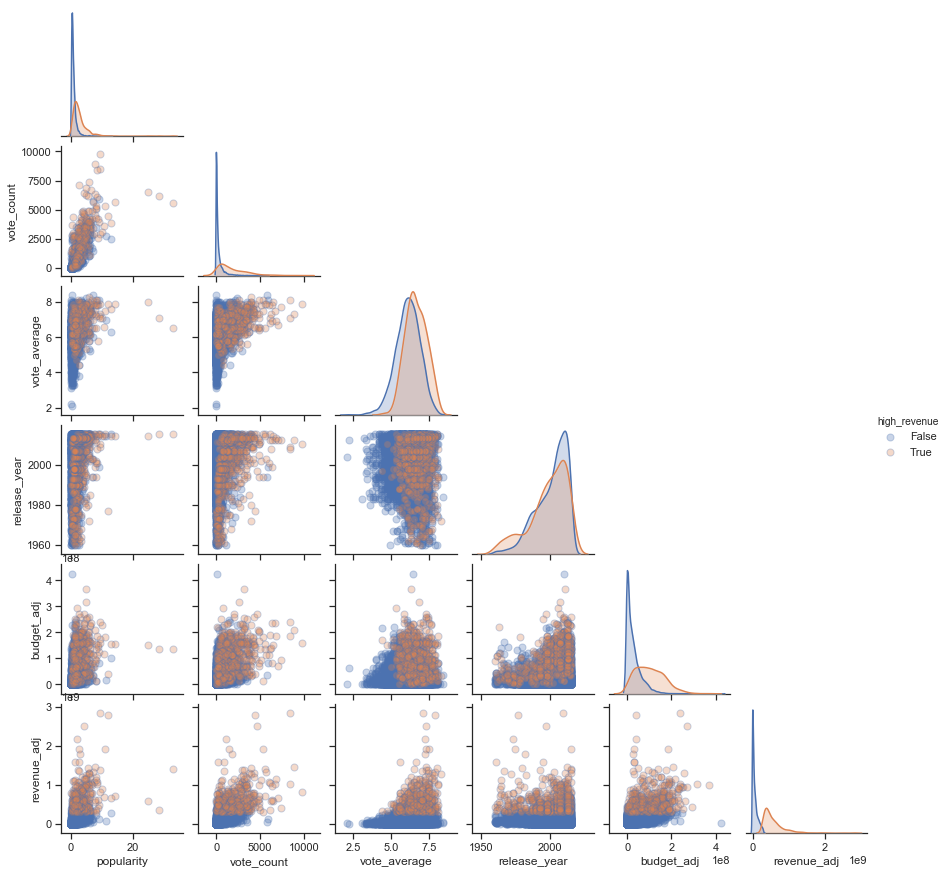

In [20]:
g = sns.pairplot(df_with_revenue, hue='high_revenue', diag_kind='kde', height=2, corner=True, 
                 plot_kws=dict(s=50, alpha=0.3, edgecolor='b', linewidth=1))

Comparison of the mean values for bothe revenue groups show slightly higher vote average and popularty scores, as well as higher user vote count and budget allocation for creating the movies

In [21]:
df_with_revenue.groupby('high_revenue').mean().loc[:, ['popularity', 'vote_count', 'vote_average', 'budget_adj']]

,popularity,vote_count,vote_average,budget_adj
high_revenue,,,,
False,0.84,286.21,6.10,27645938.03
True,2.89,1786.22,6.63,102796729.50


Correlation matrix shows that th correlation coeficient for high revenue movies is higher between the average vote and revenue parameter. Otherwise, there no significant differences.

In [22]:
df_lower_revenue.corr()

,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.00,0.79,0.24,0.22,0.30,0.43
vote_count,0.79,1.00,0.31,0.24,0.33,0.48
vote_average,0.24,0.31,1.00,-0.09,-0.06,0.13
release_year,0.22,0.24,-0.09,1.00,0.04,-0.12
budget_adj,0.30,0.33,-0.06,0.04,1.00,0.55
revenue_adj,0.43,0.48,0.13,-0.12,0.55,1.00


In [23]:
df_high_revenue.corr()

,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.00,0.68,0.36,0.33,0.26,0.35
vote_count,0.68,1.00,0.50,0.49,0.41,0.43
vote_average,0.36,0.50,1.00,-0.07,-0.10,0.30
release_year,0.33,0.49,-0.07,1.00,0.53,-0.05
budget_adj,0.26,0.41,-0.10,0.53,1.00,0.22
revenue_adj,0.35,0.43,0.30,-0.05,0.22,1.00


### Research Question 3: What are the characteristics of a succesful movie?
This question is answered in a way that the top 10 most frequent directors, actors and production companies that were involved in the creation of the movies with a high revenue are listed here. This means that if you want to predict a high revenue for a future movie, a team combined from these members will give you a promising prediction.

In [24]:
directors_high_revenue = df_high_revenue['director'].str.get_dummies(sep='|').sum().sort_values(ascending=False)
directors_high_revenue[:10]

Steven Spielberg     16
Robert Zemeckis       8
Peter Jackson         7
Michael Bay           7
Ron Howard            6
Ridley Scott          6
Christopher Nolan     5
John Lasseter         5
George Lucas          5
Tim Burton            5
dtype: int64

In [25]:
actors_high_revenue = df_high_revenue['cast'].str.get_dummies(sep='|').sum().sort_values(ascending=False)
actors_high_revenue[:10] 

Tom Cruise           16
Tom Hanks            15
Harrison Ford        12
Will Smith           12
Gary Oldman          11
Brad Pitt            11
Bruce Willis         10
Robin Williams       10
Samuel L. Jackson    10
Ben Stiller          10
dtype: int64

In [26]:
production_high_revenue = df_high_revenue['production_companies'].str.get_dummies(sep='|').sum().sort_values(ascending=False)
production_high_revenue[:10] 

Warner Bros.                              70
Universal Pictures                        57
Paramount Pictures                        51
Twentieth Century Fox Film Corporation    47
Walt Disney Pictures                      42
Columbia Pictures                         26
Amblin Entertainment                      25
Eon Productions                           21
Metro-Goldwyn-Mayer (MGM)                 20
New Line Cinema                           19
dtype: int64

<a id='conclusions'></a>
## Conclusions

**Research Question 1**: Which genres are most popular from year to year? 

> Top 3 genres were plotted for each year. Drama, Comedy and Action (Thriller) movie genres are the most popular genres over time. Similar proportion is kept over the years despite the fact that the amount of movies also has increased over time.

**Research Question 2**: What kinds of properties are associated with movies that have high revenues?

> Higher budgets and slightly higher average vote score as well as more votes and higher popularity rating can be observed for the high revenue movies.
> Furthermore, answer to the next question complements this answer with respect to stuff and cast associated with high revenue movies.

**Research Question 3**: What can we say about the success of a movie before it is released?

> This question is answered by grouping the top directors, actors and production companies that were part of the team that particiapted in creating 10% of highest earning movies. Just to name few examples of potentially succesful movie, would include directors like Steven Spielberg, Robert Zemeckis or Peter Jackson, actors like Tom Cruise or Tom Hanks; production company like Warner Bros or Paramount Pictures, and so on.



*Limitations*

Depending on the treshold chosen for the highe revenue level, the top director, actor list and production company list is also changing.

Also it was not that clear if 0 revenue and budget values are faulty, which were assumed to be faulty in the analysis and therefore filtered out.